# GLOBAL PLASTIC WASTE DATA

### Author : Eeshan Shetty

## Importing the required Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

## IMPORTING THE DATASET AND BASIC DATA PREPROCESSING

In [44]:
df=pd.read_csv('per-capita-plastic-waste-vs-gdp-per-capita.csv')

In [45]:
df

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
...,...,...,...,...,...,...,...
48163,Zimbabwe,ZWE,1988,NaN,NaN,9849000.0,NaN
48164,Zimbabwe,ZWE,1989,NaN,NaN,10154000.0,NaN
48165,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN
48166,Zimbabwe,ZWE,2019,NaN,NaN,14645000.0,NaN


In [46]:
df.head()# first 5 rows

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [47]:
df.tail()#last 5 rows

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
48163,Zimbabwe,ZWE,1988,NaN,NaN,9849000.0,NaN
48164,Zimbabwe,ZWE,1989,NaN,NaN,10154000.0,NaN
48165,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN
48166,Zimbabwe,ZWE,2019,NaN,NaN,14645000.0,NaN
48167,Åland Islands,ALA,2015,NaN,NaN,NaN,Europe


In [48]:
df.shape # number of rows and columns in data

(48168, 7)

In [49]:
df.isnull().sum()#count of null values in the data

Entity                                                     0
Code                                                    2014
Year                                                       0
Per capita plastic waste (kg/person/day)               47982
GDP per capita, PPP (constant 2011 international $)    41761
Total population (Gapminder, HYDE & UN)                 1285
Continent                                              47883
dtype: int64

In [50]:
for i in df.columns:
    print('The  of null values in {} is {}% '.format(i,(df[i].isnull().sum()/len(df)*100)))
    print('-----------------------------------------------------') # Calculating the concentration of null values in the data

The  of null values in Entity is 0.0% 
-----------------------------------------------------
The  of null values in Code is 4.181199136356087% 
-----------------------------------------------------
The  of null values in Year is 0.0% 
-----------------------------------------------------
The  of null values in Per capita plastic waste (kg/person/day) is 99.61385151968112% 
-----------------------------------------------------
The  of null values in GDP per capita, PPP (constant 2011 international $) is 86.6986380999834% 
-----------------------------------------------------
The  of null values in Total population (Gapminder, HYDE & UN) is 2.6677462215578807% 
-----------------------------------------------------
The  of null values in Continent is 99.40832087693074% 
-----------------------------------------------------


In [51]:
df.rename(columns={'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP', 
                   'Total population (Gapminder, HYDE & UN)': 'Total Population',
                    'Per capita plastic waste (kg/person/day)': 'Waste per person(kg/day)'}, inplace=True)

In [52]:
df

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
...,...,...,...,...,...,...,...
48163,Zimbabwe,ZWE,1988,NaN,NaN,9849000.0,NaN
48164,Zimbabwe,ZWE,1989,NaN,NaN,10154000.0,NaN
48165,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN
48166,Zimbabwe,ZWE,2019,NaN,NaN,14645000.0,NaN


In [53]:
incmp_df_idx = df[(df['Total Population'].isna()) & (df['GDP per capita in PPP'].isna())].index
df.drop(incmp_df_idx, inplace=True)

In [54]:
df

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN
...,...,...,...,...,...,...,...
48162,Zimbabwe,ZWE,1987,NaN,NaN,9527000.0,NaN
48163,Zimbabwe,ZWE,1988,NaN,NaN,9849000.0,NaN
48164,Zimbabwe,ZWE,1989,NaN,NaN,10154000.0,NaN
48165,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN


In [55]:
df_2010=df[df['Year']==2010]
df_2010.drop('Continent',axis=1,inplace=True)
df_2010

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04
...,...,...,...,...,...,...
47341,Western Sahara,ESH,2010,NaN,NaN,4.800000e+05
47371,World,OWID_WRL,2010,NaN,13175.933989,6.956824e+09
47503,Yemen,YEM,2010,0.103,4478.743599,2.315500e+07
47746,Zambia,ZMB,2010,NaN,3279.277161,1.360600e+07


In [56]:
df_2015=df[df['Year']==2015]
df_2010['Continent']=df_2015['Continent'].values
# Replacing Continent values as the input of 2010 was full of nulls

In [57]:
df_2015

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
14,Afghanistan,AFG,2015,NaN,1809.016488,3.441400e+07,Asia
338,Africa,NaN,2015,NaN,NaN,1.182439e+09,NaN
369,Albania,ALB,2015,NaN,10970.452245,2.891000e+06,Europe
589,Algeria,DZA,2015,NaN,13724.723853,3.972800e+07,Africa
849,American Samoa,ASM,2015,NaN,NaN,5.600000e+04,Oceania
...,...,...,...,...,...,...,...
47346,Western Sahara,ESH,2015,NaN,NaN,5.260000e+05,Africa
47376,World,OWID_WRL,2015,NaN,14778.025740,7.379797e+09,NaN
47528,Yemen,YEM,2015,NaN,2308.636584,2.649800e+07,Asia
47751,Zambia,ZMB,2015,NaN,3627.202041,1.587900e+07,Africa


In [58]:
missing_idx = df_2010[df_2010['Continent'].isna()].index
df_2010.drop(missing_idx, inplace=True)

In [59]:
df_2010=df_2010[df_2010['Waste per person(kg/day)'].notna()]
wa_g=df_2010.reset_index().drop('index',axis=1)

In [60]:
wa_g.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America


In [61]:
df2 = pd.read_csv('per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')

In [63]:
df2.head()

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [64]:
df2.rename(columns={'Per capita mismanaged plastic waste': 'Mismanaged waste per person(kg/day)',
                  'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP',
                  'Total population (Gapminder, HYDE & UN)': 'Total Population'}, inplace=True)

In [65]:
df2.drop('Continent',axis=1,inplace=True)

In [66]:
df2_2010=df2[df2.Year==2010]
df2_2010.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.032,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.086,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


In [67]:
df2_2010=df2_2010[df2_2010['Mismanaged waste per person(kg/day)'].isna()!=True]

In [68]:
df2_2010

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
344,Albania,ALB,2010,0.032,9927.181841,2948000.0
564,Algeria,DZA,2010,0.086,12870.602699,35977000.0
1074,Angola,AGO,2010,0.045,5897.682841,23356000.0
1294,Anguilla,AIA,2010,0.010,NaN,13000.0
1365,Antigua and Barbuda,ATG,2010,0.051,19212.720131,88000.0
...,...,...,...,...,...,...
45890,Uruguay,URY,2010,0.024,17082.404659,3359000.0
46330,Vanuatu,VUT,2010,0.245,2948.032937,236000.0
46770,Venezuela,VEN,2010,0.017,16544.972055,28440000.0
46990,Vietnam,VNM,2010,0.090,4408.168612,87968000.0


In [70]:
w_m = df2_2010.reset_index().drop('index', axis=1) #Reset the column index

In [71]:
w_m.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
0,Albania,ALB,2010,0.032,9927.181841,2948000.0
1,Algeria,DZA,2010,0.086,12870.602699,35977000.0
2,Angola,AGO,2010,0.045,5897.682841,23356000.0
3,Anguilla,AIA,2010,0.010,NaN,13000.0
4,Antigua and Barbuda,ATG,2010,0.051,19212.720131,88000.0


In [74]:
df_plastic_waste=pd.merge(wa_g,w_m,how='inner')#merging the dataset values

In [75]:
df_plastic_waste

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Mismanaged waste per person(kg/day)
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe,0.032
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa,0.086
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa,0.045
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America,0.010
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America,0.051
...,...,...,...,...,...,...,...,...
176,Uruguay,URY,2010,0.252,17082.404659,3359000.0,South America,0.024
177,Vanuatu,VUT,2010,0.295,2948.032937,236000.0,Oceania,0.245
178,Venezuela,VEN,2010,0.252,16544.972055,28440000.0,South America,0.017
179,Vietnam,VNM,2010,0.103,4408.168612,87968000.0,Asia,0.090


In [77]:

df_plastic_waste.columns.tolist() # Converting column names to list 

col_names = ['Entity','Code','Year','Waste per person(kg/day)','Mismanaged waste per person(kg/day)',
           'GDP per capita in PPP','Total Population','Continent']

df_plastic_waste = df_plastic_waste[col_names] # Calling the data values 

df_plastic_waste.iloc[:, 3:5] = np.around(df_plastic_waste[['Waste per person(kg/day)', 
                                                            'Mismanaged waste per person(kg/day)']], decimals=2)#Rounding Off data values
df_plastic_waste['Total Population'] = df_plastic_waste['Total Population'].astype(int)#Converting to int data type

In [78]:
df_plastic_waste['Total waste(kgs/year)'] = ((df_plastic_waste['Waste per person(kg/day)'] * 
                                    df_plastic_waste['Total Population']) * 365)
df_plastic_waste['Total waste mismanaged(kgs/year)'] = ((df_plastic_waste['Mismanaged waste per person(kg/day)'] * 
                                    df_plastic_waste['Total Population']) * 365)

In [79]:
df_plastic_waste

,Entity,Code,Year,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Total waste(kgs/year),Total waste mismanaged(kgs/year)
0,Albania,ALB,2010,0.07,0.03,9927.181841,2948000,Europe,7.532140e+07,3.228060e+07
1,Algeria,DZA,2010,0.14,0.09,12870.602699,35977000,Africa,1.838425e+09,1.181844e+09
2,Angola,AGO,2010,0.06,0.04,5897.682841,23356000,Africa,5.114964e+08,3.409976e+08
3,Anguilla,AIA,2010,0.25,0.01,NaN,13000,North America,1.186250e+06,4.745000e+04
4,Antigua and Barbuda,ATG,2010,0.66,0.05,19212.720131,88000,North America,2.119920e+07,1.606000e+06
...,...,...,...,...,...,...,...,...,...,...
176,Uruguay,URY,2010,0.25,0.02,17082.404659,3359000,South America,3.065088e+08,2.452070e+07
177,Vanuatu,VUT,2010,0.30,0.24,2948.032937,236000,Oceania,2.584200e+07,2.067360e+07
178,Venezuela,VEN,2010,0.25,0.02,16544.972055,28440000,South America,2.595150e+09,2.076120e+08
179,Vietnam,VNM,2010,0.10,0.09,4408.168612,87968000,Asia,3.210832e+09,2.889749e+09


Text(0.5, 0, 'GDP per capita in PPP')

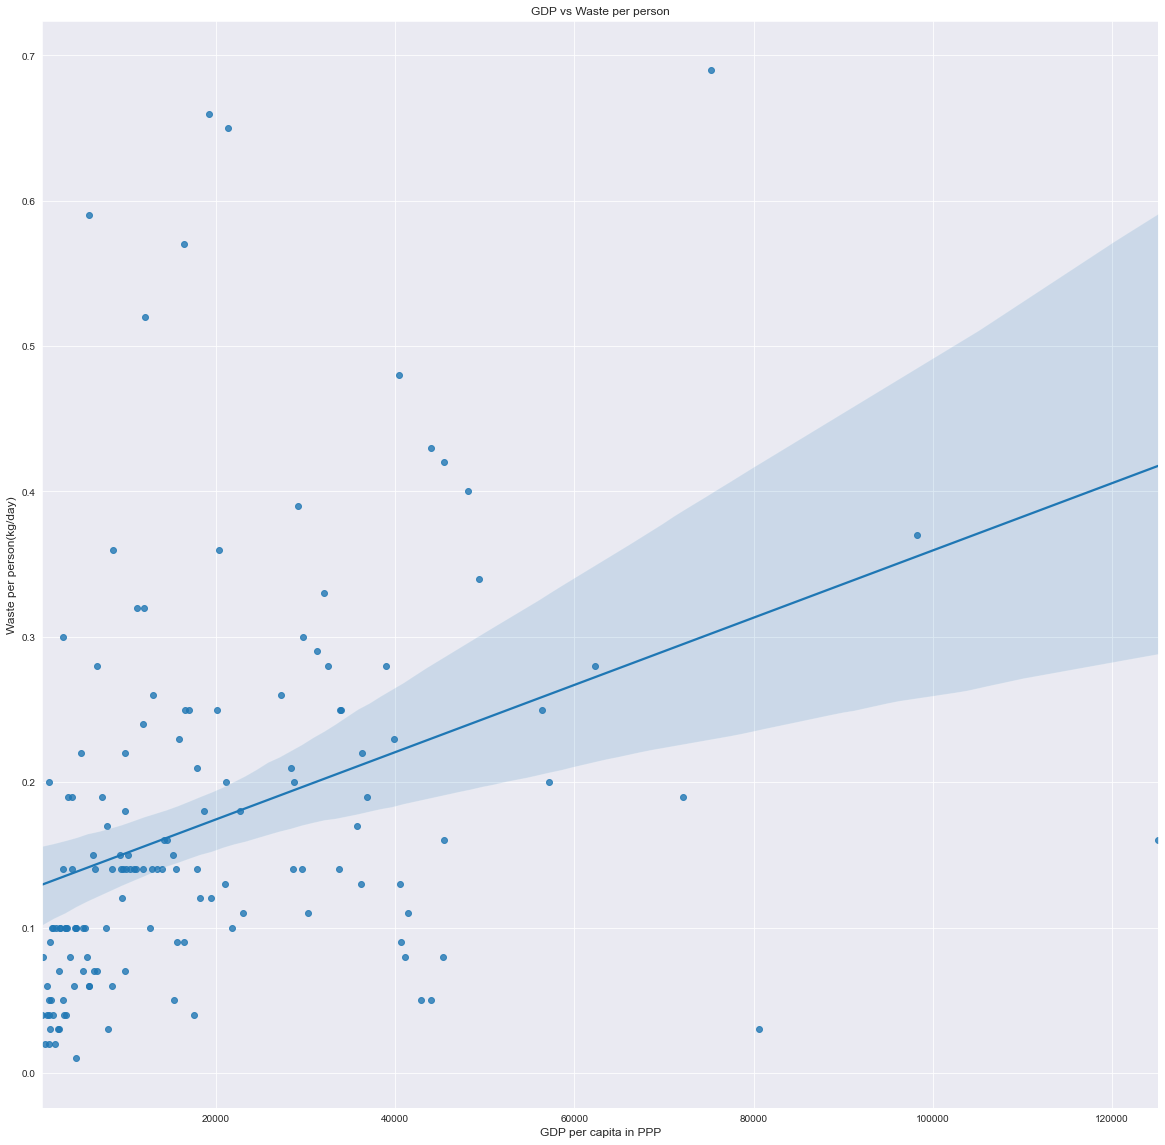

In [83]:
plt.figure(figsize=(20,20))
sns.regplot(df_plastic_waste['GDP per capita in PPP'],df_plastic_waste['Waste per person(kg/day)'])
plt.title('GDP vs Waste per person')
plt.ylabel('Waste per person(kg/day)', loc='center', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)

Text(0.5, 0, 'GDP per capita in PPP')

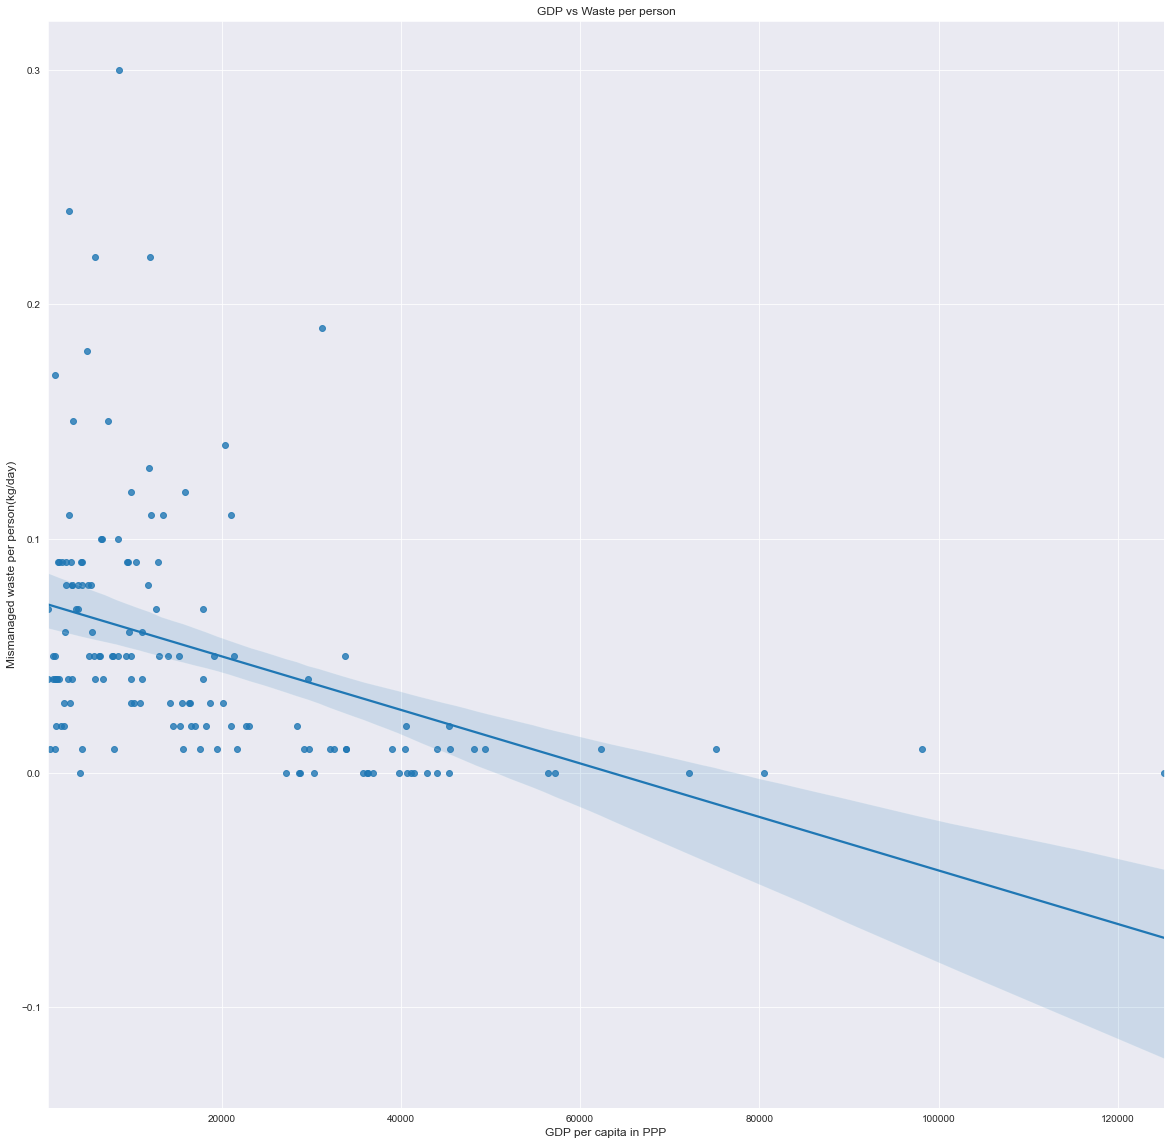

In [86]:
plt.figure(figsize=(20,20))
sns.regplot(df_plastic_waste['GDP per capita in PPP'],df_plastic_waste['Mismanaged waste per person(kg/day)'])
plt.title('GDP vs Waste per person',fontsize=12)
plt.ylabel('Mismanaged waste per person(kg/day)', loc='center', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)